In [2]:
# Load packages
import numpy as np
import pandas as pd
import os
import pickle
import time
import uuid
import scipy as scp
import scipy.stats as scps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load my own functions
import dnnregressor_train_eval_keras as dnnk
import make_data_wfpt as mdw
from kde_training_utilities import kde_load_data
import ddm_data_simulation as ddm_sim
import boundary_functions as bf

In [ ]:
# DDM
mle_out_file_path = '/media/data_cifs/afengler/data/kde/ddm/mle_runs'
mle_out_files = os.listdir(mle_out_file_path)

In [ ]:
optim_results = []
for file_ in mle_out_files:
    optim_results.append(pd.read_csv(mle_out_file_path + '/' + file_))
optim_results = pd.concat(optim_results)

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(18, 8), sharex = False, sharey = False)
sns.despine(right = True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.regplot(optim_results['a_sim'], optim_results['a_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[0],
            scatter_kws = {'s':120})

# ax.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1.1))
axes[0].set_xlabel('a-simulation', fontsize = 24);
axes[0].set_ylabel('a-mle', fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['a_mle'], 1), np.expand_dims(optim_results['a_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['a_mle'], 1), np.expand_dims(optim_results['a_sim'], 1))
axes[0].text(x = 1.4, y = 0.5, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)

# Plot a kernel density estimate and rug plot
sns.regplot(optim_results['w_sim'], optim_results['w_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[1],
            scatter_kws = {'s':120})
axes[1].set_xlabel('w-simulation',fontsize = 24);
axes[1].set_ylabel('w-mle',fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
axes[1].text(x = 0.55, y = 0.28, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)

# Plot a filled kernel density estimate
sns.regplot(optim_results['v_sim'], optim_results['v_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[2],
            scatter_kws = {'s': 120})

axes[2].set_xlabel('v-simulation',fontsize = 24);
axes[2].set_ylabel('v-mle',fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
axes[2].text(x = 0.7, y = - 1.85, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)


# Plot a historgram and kernel density estimate
#sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [ ]:
reg = LinearRegression().fit(np.expand_dims(optim_results['a_mle'], 1), np.expand_dims(optim_results['a_sim'], 1))
reg.score(np.expand_dims(optim_results['a_mle'], 1), np.expand_dims(optim_results['a_sim'], 1))

In [ ]:
# LINEAR COLLAPSE
mle_out_file_path = '/media/data_cifs/afengler/data/kde/linear_collapse/mle_runs'
mle_out_files = os.listdir(mle_out_file_path)

In [ ]:
optim_results = []
for file_ in mle_out_files:
    optim_results.append(pd.read_csv(mle_out_file_path + '/' + file_))
optim_results = pd.concat(optim_results)

In [ ]:
sns.set(style = "white", palette = "muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 3, figsize=(18, 16), sharex = False, sharey = False)
sns.despine(right = True)

# Plot a simple histogram with binsize determined automatically
sns.regplot(optim_results['a_sim'], optim_results['a_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[0, 0],
            scatter_kws = {'s':120})

# ax.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1.1))
axes[0, 0].set_xlabel('a-simulation', fontsize = 24);
axes[0, 0].set_ylabel('a-mle', fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['a_mle'], 1), np.expand_dims(optim_results['a_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['a_mle'], 1), np.expand_dims(optim_results['a_sim'], 1))
axes[0, 0].text(x = 1.4, y = 0.4, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)

# Plot a kernel density estimate and rug plot
sns.regplot(optim_results['w_sim'], optim_results['w_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[0, 1],
            scatter_kws = {'s':120})
axes[0, 1].set_xlabel('w-simulation',fontsize = 24);
axes[0, 1].set_ylabel('w-mle',fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
axes[0, 1].text(x = 0.55, y = 0.28, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)

# Plot a filled kernel density estimate
sns.regplot(optim_results['v_sim'], optim_results['v_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[0, 2],
            scatter_kws = {'s': 120})

axes[0, 2].set_xlabel('v-simulation',fontsize = 24);
axes[0, 2].set_ylabel('v-mle',fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
axes[0, 2].text(x = 0.5, y = - .9, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)

# Plot a filled kernel density estimate
sns.regplot(optim_results['theta_sim'], optim_results['theta_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[1, 0],
            scatter_kws = {'s': 120})

axes[1, 0].set_xlabel('theta-simulation',fontsize = 24);
axes[1, 0].set_ylabel('theta-mle',fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['theta_mle'], 1), np.expand_dims(optim_results['theta_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['theta_mle'], 1), np.expand_dims(optim_results['theta_sim'], 1))
axes[1, 0].text(x = 0.9, y = 0.3, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)
# Plot a historgram and kernel density estimate
#sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [ ]:
# ORNSTEIN-UHLENBECK
mle_out_file_path = '/media/data_cifs/afengler/data/kde/ornstein_uhlenbeck/mle_runs'
mle_out_files = os.listdir(mle_out_file_path)

In [ ]:
optim_results = []
for file_ in mle_out_files:
    optim_results.append(pd.read_csv(mle_out_file_path + '/' + file_))
optim_results = pd.concat(optim_results)

In [ ]:
sns.set(style = "white", palette = "muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 3, figsize=(18, 16), sharex = False, sharey = False)
sns.despine(right = True)

# Plot a simple histogram with binsize determined automatically
sns.regplot(optim_results['a_sim'], optim_results['a_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[0, 0],
            scatter_kws = {'s':120})

# ax.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1.1))
axes[0, 0].set_xlabel('a-simulation', fontsize = 24);
axes[0, 0].set_ylabel('a-mle', fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['a_mle'], 1), np.expand_dims(optim_results['a_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['a_mle'], 1), np.expand_dims(optim_results['a_sim'], 1))
axes[0, 0].text(x = 1.4, y = 0.4, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)

# Plot a kernel density estimate and rug plot
sns.regplot(optim_results['w_sim'], optim_results['w_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[0, 1],
            scatter_kws = {'s':120})
axes[0, 1].set_xlabel('w-simulation',fontsize = 24);
axes[0, 1].set_ylabel('w-mle',fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
axes[0, 1].text(x = 0.55, y = 0.28, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)

# Plot a filled kernel density estimate
sns.regplot(optim_results['v_sim'], optim_results['v_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[0, 2],
            scatter_kws = {'s': 120})

axes[0, 2].set_xlabel('v-simulation',fontsize = 24);
axes[0, 2].set_ylabel('v-mle',fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
axes[0, 2].text(x = 0.5, y = - .9, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)

# Plot a filled kernel density estimate
sns.regplot(optim_results['g_sim'], optim_results['g_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[1, 0],
            scatter_kws = {'s': 120})

axes[1, 0].set_xlabel('g-simulation',fontsize = 24);
axes[1, 0].set_ylabel('g-mle',fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['g_mle'], 1), np.expand_dims(optim_results['g_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['g_mle'], 1), np.expand_dims(optim_results['g_sim'], 1))
axes[1, 0].text(x = 0.9, y = 0.3, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)
# Plot a historgram and kernel density estimate
#sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [7]:
# FULL DDM
mle_out_file_path = '/media/data_cifs/afengler/data/kde/full_ddm/mle_runs'
mle_out_files = os.listdir(mle_out_file_path)

In [8]:
optim_results = []
for file_ in mle_out_files:
    optim_results.append(pd.read_csv(mle_out_file_path + '/' + file_))
optim_results = pd.concat(optim_results)

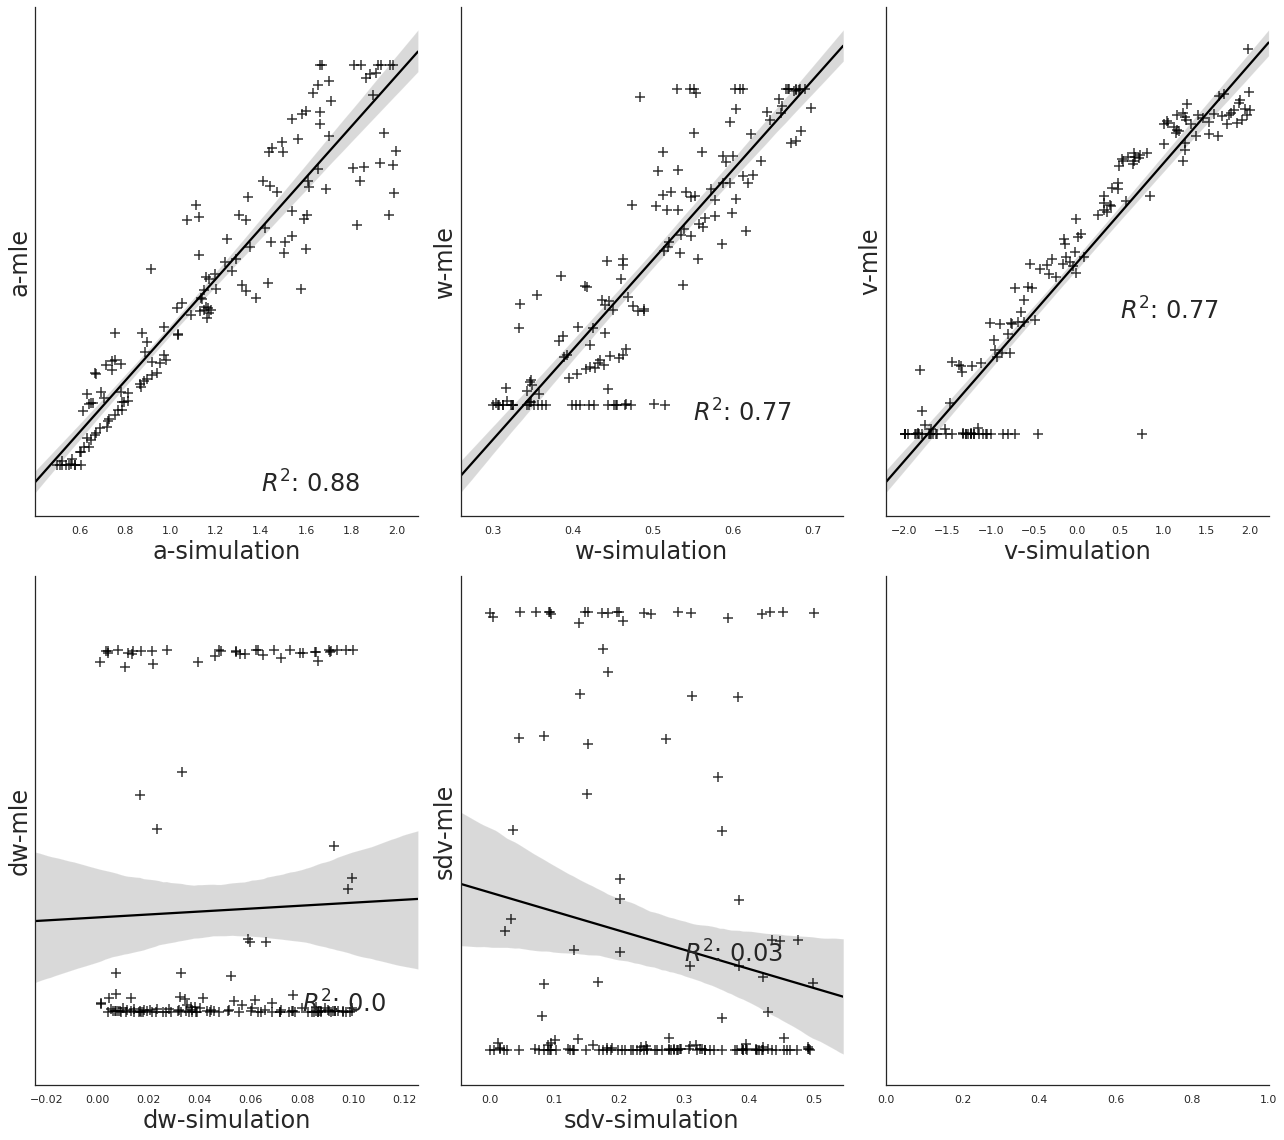

In [10]:
sns.set(style = "white", palette = "muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 3, figsize=(18, 16), sharex = False, sharey = False)
sns.despine(right = True)

# Plot a simple histogram with binsize determined automatically
sns.regplot(optim_results['a_sim'], optim_results['a_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[0, 0],
            scatter_kws = {'s':120})

# ax.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1.1))
axes[0, 0].set_xlabel('a-simulation', fontsize = 24);
axes[0, 0].set_ylabel('a-mle', fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['a_mle'], 1), np.expand_dims(optim_results['a_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['a_mle'], 1), np.expand_dims(optim_results['a_sim'], 1))
axes[0, 0].text(x = 1.4, y = 0.4, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)

# Plot a kernel density estimate and rug plot
sns.regplot(optim_results['w_sim'], optim_results['w_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[0, 1],
            scatter_kws = {'s':120})
axes[0, 1].set_xlabel('w-simulation',fontsize = 24);
axes[0, 1].set_ylabel('w-mle',fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
axes[0, 1].text(x = 0.55, y = 0.28, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)

# Plot a filled kernel density estimate
sns.regplot(optim_results['v_sim'], optim_results['v_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[0, 2],
            scatter_kws = {'s': 120})

axes[0, 2].set_xlabel('v-simulation',fontsize = 24);
axes[0, 2].set_ylabel('v-mle',fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['w_mle'], 1), np.expand_dims(optim_results['w_sim'], 1))
axes[0, 2].text(x = 0.5, y = - .9, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)

# Plot a filled kernel density estimate
sns.regplot(optim_results['dw_sim'], optim_results['dw_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[1, 0],
            scatter_kws = {'s': 120})

axes[1, 0].set_xlabel('dw-simulation',fontsize = 24);
axes[1, 0].set_ylabel('dw-mle',fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['dw_mle'], 1), np.expand_dims(optim_results['dw_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['dw_mle'], 1), np.expand_dims(optim_results['dw_sim'], 1))
axes[1, 0].text(x = 0.08, y = 0.0, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)
# Plot a historgram and kernel density estimate
#sns.distplot(d, color="m", ax=axes[1, 1])

# Plot a filled kernel density estimate
sns.regplot(optim_results['sdv_sim'], optim_results['sdv_mle'], 
            color = 'black', 
            marker =  '+',
            ax = axes[1, 1],
            scatter_kws = {'s': 120})

axes[1, 1].set_xlabel('sdv-simulation', fontsize = 24);
axes[1, 1].set_ylabel('sdv-mle', fontsize = 24);

reg = LinearRegression().fit(np.expand_dims(optim_results['sdv_mle'], 1), np.expand_dims(optim_results['sdv_sim'], 1))
txt = reg.score(np.expand_dims(optim_results['sdv_mle'], 1), np.expand_dims(optim_results['sdv_sim'], 1))
axes[1, 1].text(x = 0.3, y = 0.1, s = '$R^2$: ' +  str(round(txt, 2)), fontsize = 24)


plt.setp(axes, yticks=[])
plt.tight_layout()